In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

In [2]:
x = np.ones([201, 2])
x[:, 0] = np.linspace(-1, 1, 201)

mu = 0  # mean of observation noise
sigma = 0.3  # variance of observation noise
W = np.array([[-1.3, 0.5]]) # weight parameters [W0 W1]

# generate target data using observations x, weight parameters W and observation noise N(mu, sigma)
y = x @ W.T + np.random.normal(mu, sigma, x[:, 0:1].shape)

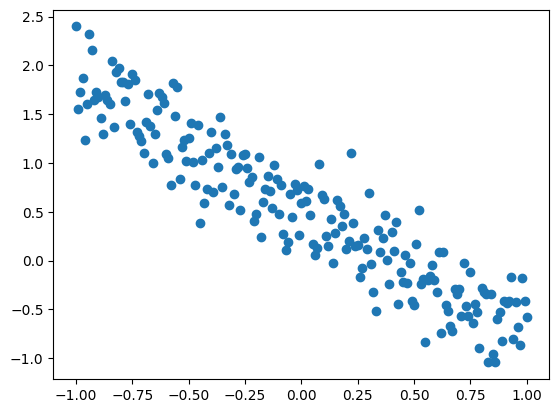

In [3]:
plt.scatter(x[:, 0:1], y[:, 0:1])

In [4]:
t = 0.5
prior_var = t * np.eye(W.shape[1])
prior_w = multivariate_normal(mean=[0, 0], cov=prior_var)

In [5]:
def plot_over_w(dist, title):
    w0, w1 = np.mgrid[-3:1:.01, -1:3:.01]
    pos = np.empty([w0.shape[0], w0.shape[0], 2])
    pos[:, :, 0] = w0; pos[:, :, 1] = w1
    plt.contourf(w0, w1, dist.pdf(pos))
    plt.xlabel('$w_0$', fontsize=16)
    plt.ylabel('$w_1$', fontsize=16)
    plt.title(title, fontsize=16)

In [6]:
def sample_lines(x, y, m, s):
    W = np.random.multivariate_normal(m.flatten(), cov=s)
    return x @ W[:, np.newaxis]

def plot_lines(x, y, m, s, N, title='Data space (%d data points)' % x.shape[0]):
    lines = np.array([sample_lines(x, y, m, s) for _ in range(N)]) # sample N straight lines from posterior
    plt.plot(x[:, 0], lines[:, :, 0].T, 'r')
    plt.plot(x[:, 0], y, marker='o', linestyle='none', color='b')
    plt.xlabel('$x$', fontsize=16)
    plt.ylabel('$y$', fontsize=16)
    plt.title(title, fontsize=16)

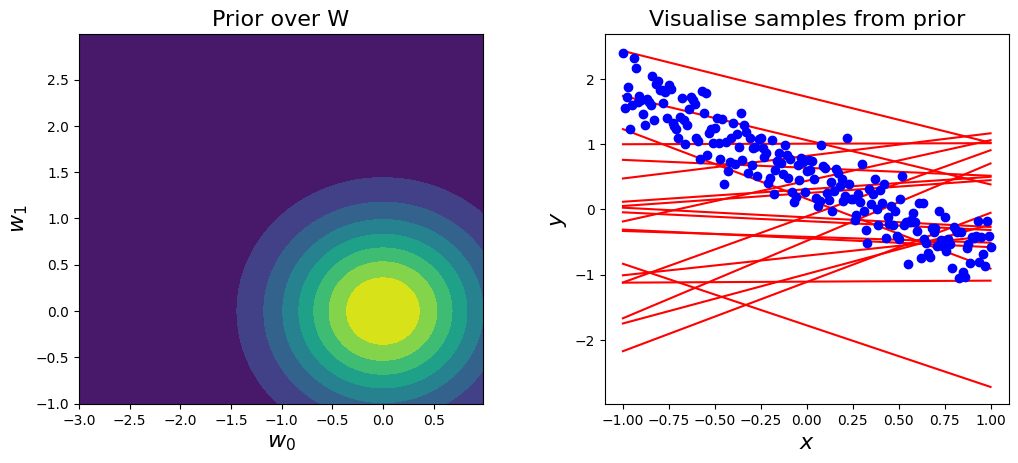

In [7]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.subplot(2, 2, 1)
plot_over_w(prior_w, 'Prior over W')

plt.subplot(2, 2, 2)
plot_lines(x, y, np.array([0, 0]), prior_var, 20, 'Visualise samples from prior') 

In [8]:
def posterior(x, y):
    tI = t * np.identity(x.shape[1])
    m_n = np.linalg.inv((x.T @ x)/sigma + tI) @ x.T @ y / sigma
    s_n_inv = (x.T @ x)/sigma + tI
    s_n = np.linalg.inv(s_n_inv)
    return m_n, s_n


-----Mean and covariance of posterior for all data points-----
mean: [-1.30, 0.53]
covariance: 
[[4.42347390e-03 1.56254897e-19]
 [1.56254897e-19 1.49142431e-03]]


/var/folders/xv/8r23mzm112ggs6n6_tvn5cn00000gn/T/ipykernel_82354/1121030922.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("mean: [%.2f, %.2f]" % (m[0], m[1]))


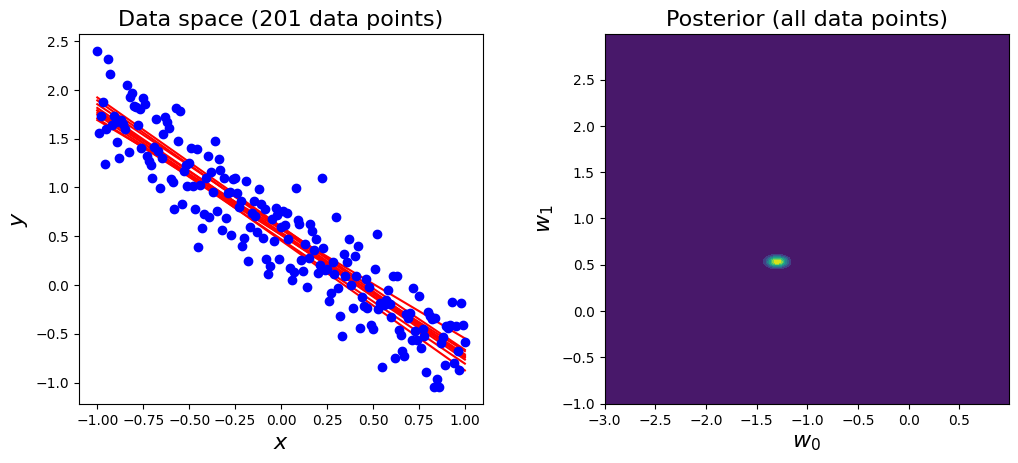

In [9]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# calculate posterior with all data points
m, s = posterior(x, y)
posterior_w = multivariate_normal(mean=m.flatten(), cov=s)

# sample from posterior and plot "possible" lines
plt.subplot(2, 2, 1)
plot_lines(x, y, m, s, N=10) 

# plot posterior over w
plt.subplot(2, 2, 2)
plot_over_w(posterior_w, 'Posterior (all data points)')

print("\n-----Mean and covariance of posterior for all data points-----")
print("mean: [%.2f, %.2f]" % (m[0], m[1]))
print("covariance: ")
print(s)


-----Mean and covariance of posterior for 10 data points-----
mean: [-0.90, 0.95]
covariance: 
[[1.02748956 0.97021965]
 [0.97021965 0.94892872]]

-----Mean and covariance of posterior for 50 data points-----
mean: [-1.20, 0.65]
covariance: 
[[0.24663435 0.18687005]
 [0.18687005 0.14769157]]

-----Mean and covariance of posterior for 200 data points-----
mean: [-1.30, 0.53]
covariance: 
[[4.55788410e-03 4.55445110e-05]
 [4.55445110e-05 1.50685731e-03]]


/var/folders/xv/8r23mzm112ggs6n6_tvn5cn00000gn/T/ipykernel_82354/4260546911.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("mean: [%.2f, %.2f]" % (m[0], m[1]))


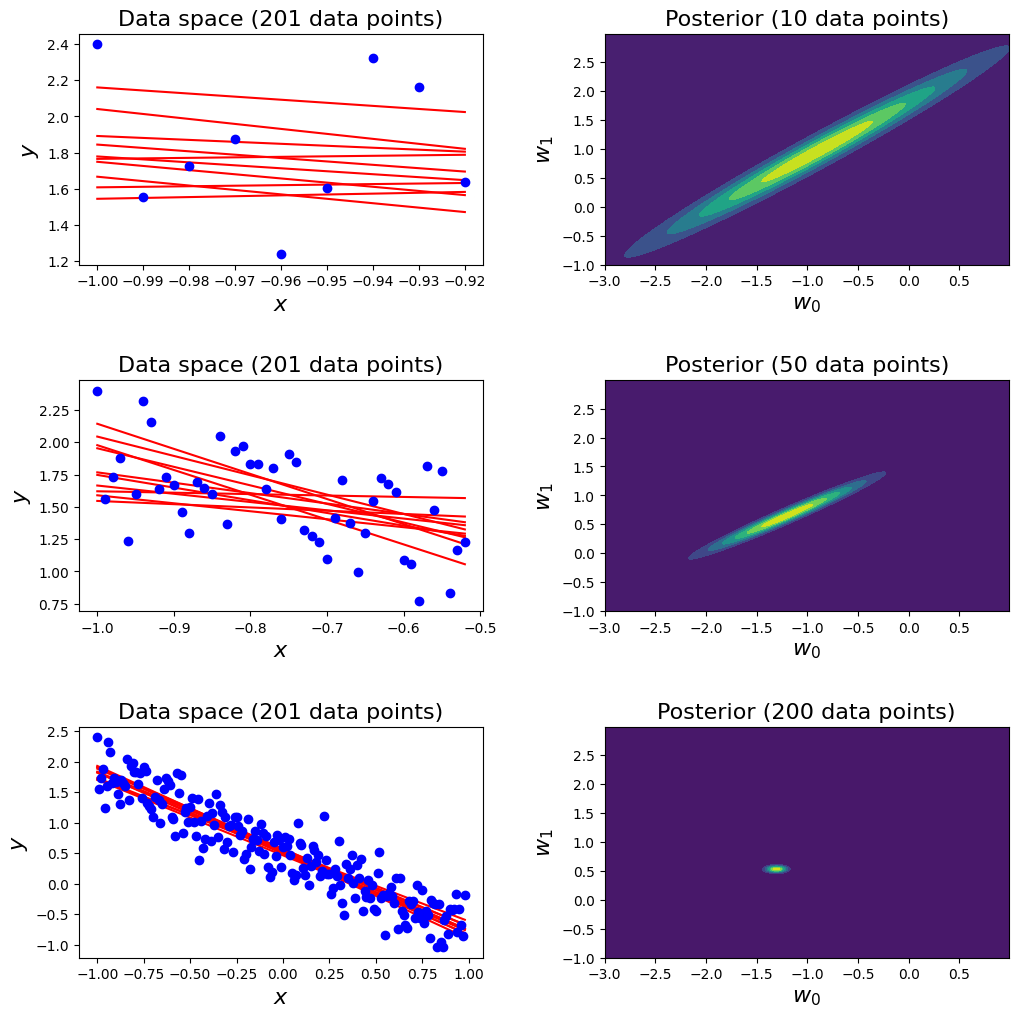

In [10]:
fig = plt.figure(figsize=(12, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

import pprint
pp = pprint.PrettyPrinter(indent=4)

num_data_points = [10, 50, 200]
for index, i in enumerate(num_data_points):
    # calculate posterior for i data points
    m, s = posterior(x[:i-1], y[:i-1])
    posterior_w = multivariate_normal(mean=m.flatten(), cov=s)
    
    print("\n-----Mean and covariance of posterior for %i data points-----" % i)
    print("mean: [%.2f, %.2f]" % (m[0], m[1]))
    print("covariance: ")
    print(s)
    
    # sample from posterior and plot "possible" lines
    plt.subplot(len(num_data_points), 2, 2*index+1)
    plot_lines(x[:i-1, :], y[:i-1], m, s, N=10) 
    
    # plot posterior over w
    plt.subplot(len(num_data_points), 2, 2*index+2)
    plot_over_w(posterior_w, 'Posterior (%d data points)' % i)